<a href="https://colab.research.google.com/github/RAHULBAID-png/EV-Market-Segmentation/blob/main/Indian_EV_Analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


# Task 1
Calculate and visualize the Compound Annual Growth Rate (CAGR) of sales for each vehicle type/model from the dataset provided at "/content/drive/MyDrive/indian-ev-data.csv".

## Data loading

### Subtask:
Load the dataset from "/content/drive/MyDrive/indian-ev-data.csv" into a pandas DataFrame.


In [ ]:
import pandas as pd

df = pd.read_csv('/content/drive/MyDrive/indian-ev-data.csv')
display(df.head())

,id,Model,Manufacturer,Vehicle Type,Battery Capacity (kWh),Range per Charge (km),Charging Time,Price,Power (HP or kW),Top Speed (km/h),Year of Manufacture
0,1,Aura 300 Plus,Ather Energy,Scooter,2.9,116,4.5,129000.0,6.0,80.0,2021.0
1,2,Pure EV Epluto 7G,Pure EV,Scooter,2.7,120,3.0,109000.0,5.0,80.0,2021.0
2,3,Bajaj Chetak Electric,Bajaj Auto,Scooter,4.0,95,5.0,150000.0,4.0,60.0,2020.0
3,4,Okinawa iPraise Pro,Okinawa Autotech,Scooter,2.5,100,3.0,85000.0,3.0,60.0,2021.0
4,5,Hero Electric Opto EV,Hero Motocorp,Scooter,2.2,75,3.0,75000.0,3.0,60.0,2021.0


Error: Runtime no longer has a reference to this dataframe, please re-run this cell and try again.


## Data cleaning

### Subtask:
Handle missing values and ensure data types are appropriate for calculations.


In [ ]:
print("Relevant columns for CAGR calculation:")
relevant_columns = ['Year of Manufacture', 'Vehicle Type', 'Model']
print(relevant_columns)

print("\nData types of relevant columns:")
print(df[relevant_columns].dtypes)

print("\nMissing values before handling:")
print(df[relevant_columns].isnull().sum())

# Handle missing values in 'Year of Manufacture' by dropping rows
df.dropna(subset=['Year of Manufacture'], inplace=True)

print("\nMissing values after handling:")
print(df[relevant_columns].isnull().sum())

# Convert 'Year of Manufacture' to integer type
df['Year of Manufacture'] = df['Year of Manufacture'].astype(int)

print("\nData types after conversion:")
print(df[relevant_columns].dtypes)

display(df.head())

Relevant columns for CAGR calculation:
['Year of Manufacture', 'Vehicle Type', 'Model']

Data types of relevant columns:
Year of Manufacture     int64
Vehicle Type           object
Model                  object
dtype: object

Missing values before handling:
Year of Manufacture    0
Vehicle Type           0
Model                  0
dtype: int64

Missing values after handling:
Year of Manufacture    0
Vehicle Type           0
Model                  0
dtype: int64

Data types after conversion:
Year of Manufacture     int64
Vehicle Type           object
Model                  object
dtype: object


,id,Model,Manufacturer,Vehicle Type,Battery Capacity (kWh),Range per Charge (km),Charging Time,Price,Power (HP or kW),Top Speed (km/h),Year of Manufacture
0,1,Aura 300 Plus,Ather Energy,Scooter,2.9,116,4.5,129000.0,6.0,80.0,2021
1,2,Pure EV Epluto 7G,Pure EV,Scooter,2.7,120,3.0,109000.0,5.0,80.0,2021
2,3,Bajaj Chetak Electric,Bajaj Auto,Scooter,4.0,95,5.0,150000.0,4.0,60.0,2020
3,4,Okinawa iPraise Pro,Okinawa Autotech,Scooter,2.5,100,3.0,85000.0,3.0,60.0,2021
4,5,Hero Electric Opto EV,Hero Motocorp,Scooter,2.2,75,3.0,75000.0,3.0,60.0,2021


## Data preparation

### Subtask:
Aggregate the data to get the number of vehicles sold for each type/model per year.


In [ ]:
vehicles_by_year_type_model = df.groupby(['Year of Manufacture', 'Vehicle Type', 'Model']).size().reset_index(name='Number of Vehicles Sold')
display(vehicles_by_year_type_model.head())

,Year of Manufacture,Vehicle Type,Model,Number of Vehicles Sold
0,2020,Scooter,Bajaj Chetak Electric,2
1,2021,Bike,Joy E-Bike Urbanite X1,1
2,2021,Bike,Joy e-Ride,1
3,2021,Bike,Revolt RV400,3
4,2021,Bike,Tork T6X,3


## Cagr calculation

### Subtask:
Calculate the Compound Annual Growth Rate (CAGR) for each vehicle type/model based on the yearly sales data.


In [ ]:
yearly_sales_summary = vehicles_by_year_type_model.groupby(['Vehicle Type', 'Model']).agg(
    first_year=('Year of Manufacture', 'min'),
    last_year=('Year of Manufacture', 'max')
).reset_index()

first_year_sales_df = vehicles_by_year_type_model.copy()
first_year_sales_df = pd.merge(first_year_sales_df, yearly_sales_summary[['Vehicle Type', 'Model', 'first_year']], on=['Vehicle Type', 'Model'])
first_year_sales_df = first_year_sales_df[first_year_sales_df['Year of Manufacture'] == first_year_sales_df['first_year']]
first_year_sales_df = first_year_sales_df.rename(columns={'Number of Vehicles Sold': 'First Year Sales'})[['Vehicle Type', 'Model', 'First Year Sales']]


last_year_sales_df = vehicles_by_year_type_model.copy()
last_year_sales_df = pd.merge(last_year_sales_df, yearly_sales_summary[['Vehicle Type', 'Model', 'last_year']], on=['Vehicle Type', 'Model'])
last_year_sales_df = last_year_sales_df[last_year_sales_df['Year of Manufacture'] == last_year_sales_df['last_year']]
last_year_sales_df = last_year_sales_df.rename(columns={'Number of Vehicles Sold': 'Last Year Sales'})[['Vehicle Type', 'Model', 'Last Year Sales']]


yearly_sales_summary = pd.merge(yearly_sales_summary, first_year_sales_df, on=['Vehicle Type', 'Model'], how='left')
yearly_sales_summary = pd.merge(yearly_sales_summary, last_year_sales_df, on=['Vehicle Type', 'Model'], how='left')


def calculate_cagr(row):
    first_year = row['first_year']
    last_year = row['last_year']
    first_year_sales = row['First Year Sales']
    last_year_sales = row['Last Year Sales']

    if first_year_sales == 0 or first_year == last_year:
        return 0.0
    else:
        num_years = last_year - first_year
        return ((last_year_sales / first_year_sales) ** (1 / num_years)) - 1

yearly_sales_summary['CAGR'] = yearly_sales_summary.apply(calculate_cagr, axis=1)

display(yearly_sales_summary.head())

,Vehicle Type,Model,first_year,last_year,First Year Sales,Last Year Sales,CAGR
0,Bike,Joy E-Bike Urbanite X1,2021,2021,1,1,0.000000
1,Bike,Joy E-Bike Urbanite X2,2022,2022,1,1,0.000000
2,Bike,Joy E-Bike Urbanite X3,2022,2022,1,1,0.000000
3,Bike,Joy e-Ride,2021,2021,1,1,0.000000
4,Bike,Revolt RV400,2021,2022,3,1,-0.666667


## Data visualization

### Subtask:
Create a graph to visualize the CAGR for each vehicle type/model.


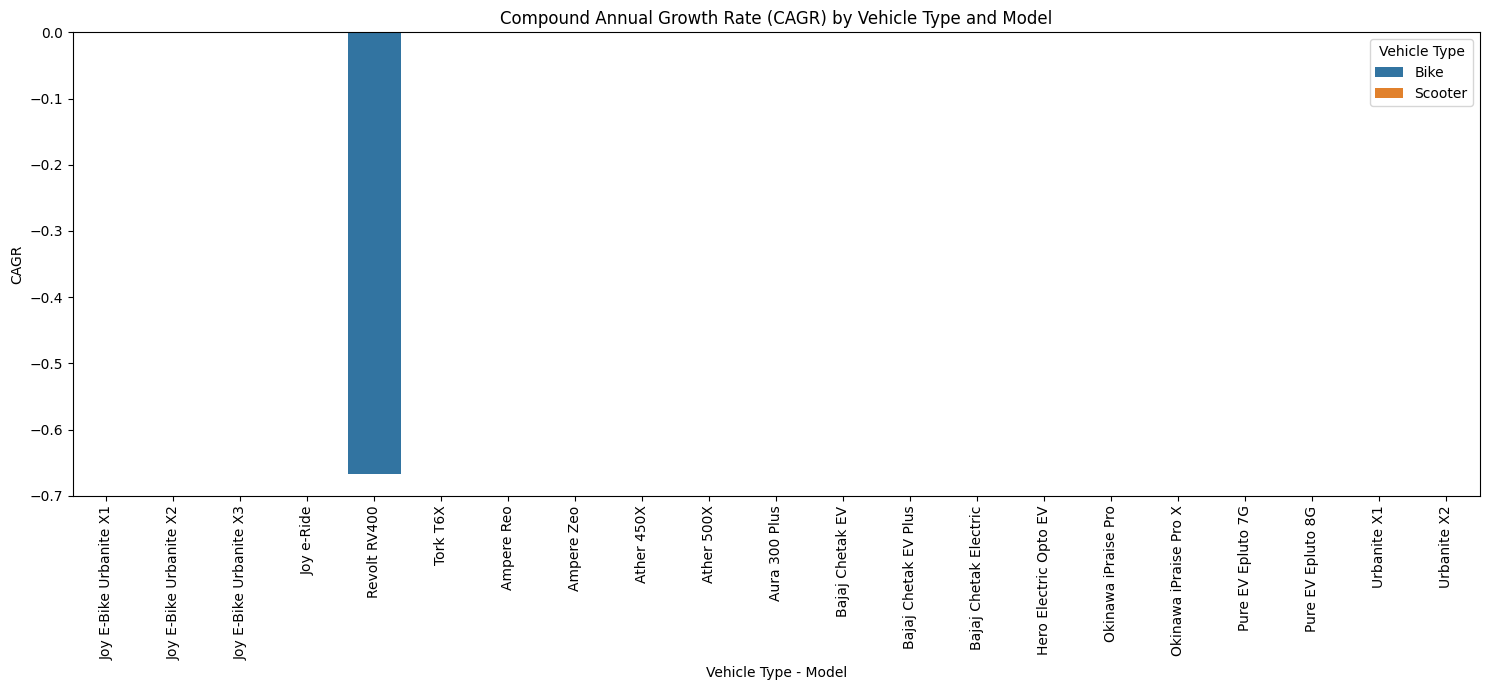

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(15, 7))
sns.barplot(data=yearly_sales_summary, x='Model', y='CAGR', hue='Vehicle Type', dodge=False)
plt.xticks(rotation=90)
plt.xlabel("Vehicle Type - Model")
plt.ylabel("CAGR")
plt.title("Compound Annual Growth Rate (CAGR) by Vehicle Type and Model")
plt.tight_layout()
plt.show()

# Task 2
Construct a heatmap visualization of yearly sales and a graph of the Compound Annual Growth Rate (CAGR) for each vehicle type using the dataset from "/content/drive/MyDrive/indian-ev-data.csv".

## Data loading

### Subtask:
Load the dataset from "/content/drive/MyDrive/indian-ev-data.csv" into a pandas DataFrame.


In [ ]:
import pandas as pd

df = pd.read_csv('/content/drive/MyDrive/indian-ev-data.csv')
display(df.head())

,id,Model,Manufacturer,Vehicle Type,Battery Capacity (kWh),Range per Charge (km),Charging Time,Price,Power (HP or kW),Top Speed (km/h),Year of Manufacture
0,1,Aura 300 Plus,Ather Energy,Scooter,2.9,116,4.5,129000.0,6.0,80.0,2021.0
1,2,Pure EV Epluto 7G,Pure EV,Scooter,2.7,120,3.0,109000.0,5.0,80.0,2021.0
2,3,Bajaj Chetak Electric,Bajaj Auto,Scooter,4.0,95,5.0,150000.0,4.0,60.0,2020.0
3,4,Okinawa iPraise Pro,Okinawa Autotech,Scooter,2.5,100,3.0,85000.0,3.0,60.0,2021.0
4,5,Hero Electric Opto EV,Hero Motocorp,Scooter,2.2,75,3.0,75000.0,3.0,60.0,2021.0


## Data preparation

### Subtask:
Aggregate the data to get the number of vehicles sold for each vehicle type per year.


In [ ]:
vehicles_by_year_type = df.groupby(['Year of Manufacture', 'Vehicle Type']).size().reset_index(name='Number of Vehicles Sold')
display(vehicles_by_year_type.head())

,Year of Manufacture,Vehicle Type,Number of Vehicles Sold
0,2020.0,Scooter,2
1,2021.0,Bike,8
2,2021.0,Scooter,27
3,2022.0,Bike,3
4,2022.0,Scooter,9


## Cagr calculation

### Subtask:
Calculate the Compound Annual Growth Rate (CAGR) for each vehicle type based on the yearly sales data.


In [ ]:
yearly_sales_summary_type = vehicles_by_year_type.groupby('Vehicle Type').agg(
    first_year=('Year of Manufacture', 'min'),
    last_year=('Year of Manufacture', 'max')
).reset_index()

first_year_sales_type = pd.merge(vehicles_by_year_type, yearly_sales_summary_type, left_on=['Vehicle Type', 'Year of Manufacture'], right_on=['Vehicle Type', 'first_year'], how='inner')
first_year_sales_type = first_year_sales_type.rename(columns={'Number of Vehicles Sold': 'First Year Sales'})[['Vehicle Type', 'First Year Sales']]

last_year_sales_type = pd.merge(vehicles_by_year_type, yearly_sales_summary_type, left_on=['Vehicle Type', 'Year of Manufacture'], right_on=['Vehicle Type', 'last_year'], how='inner')
last_year_sales_type = last_year_sales_type.rename(columns={'Number of Vehicles Sold': 'Last Year Sales'})[['Vehicle Type', 'Last Year Sales']]

yearly_sales_summary_type = pd.merge(yearly_sales_summary_type, first_year_sales_type, on='Vehicle Type', how='left')
yearly_sales_summary_type = pd.merge(yearly_sales_summary_type, last_year_sales_type, on='Vehicle Type', how='left')


def calculate_cagr_type(row):
    first_year = row['first_year']
    last_year = row['last_year']
    first_year_sales = row['First Year Sales']
    last_year_sales = row['Last Year Sales']

    if first_year_sales == 0 or first_year == last_year:
        return 0.0
    else:
        num_years = last_year - first_year
        return ((last_year_sales / first_year_sales) ** (1 / num_years)) - 1

yearly_sales_summary_type['CAGR'] = yearly_sales_summary_type.apply(calculate_cagr_type, axis=1)

display(yearly_sales_summary_type.head())

,Vehicle Type,first_year,last_year,First Year Sales,Last Year Sales,CAGR
0,Bike,2021.0,2022.0,8,3,-0.62500
1,Scooter,2020.0,2022.0,2,9,1.12132


## Data visualization

### Subtask:
Create a heatmap to visualize the yearly sales of each vehicle type and a graph to visualize the CAGR for each vehicle type.


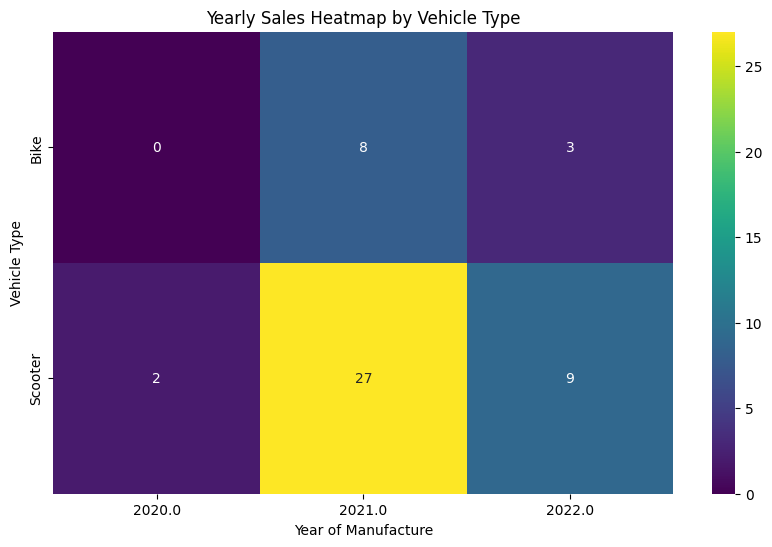

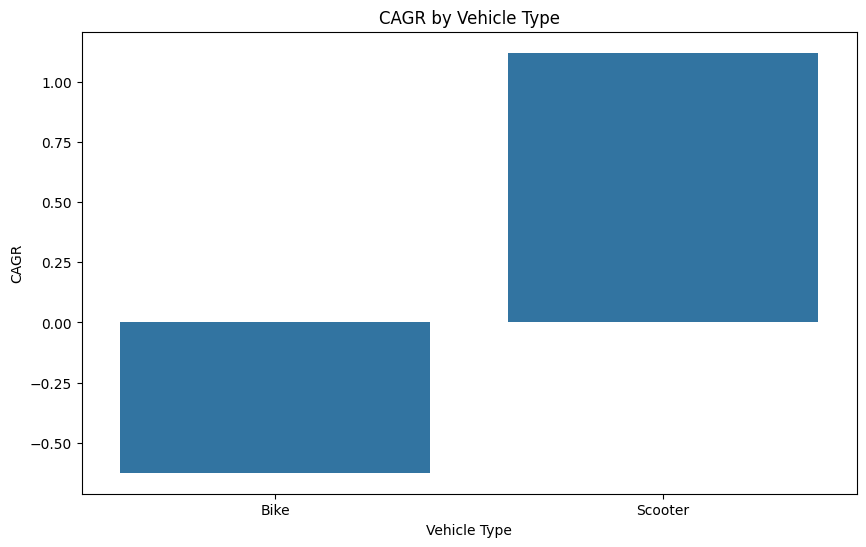

In [ ]:
vehicles_by_year_type_pivot = vehicles_by_year_type.pivot_table(index='Vehicle Type', columns='Year of Manufacture', values='Number of Vehicles Sold').fillna(0)

plt.figure(figsize=(10, 6))
sns.heatmap(vehicles_by_year_type_pivot, annot=True, fmt='g', cmap='viridis')
plt.title("Yearly Sales Heatmap by Vehicle Type")
plt.show()

plt.figure(figsize=(10, 6))
sns.barplot(data=yearly_sales_summary_type, x='Vehicle Type', y='CAGR')
plt.title("CAGR by Vehicle Type")
plt.ylabel("CAGR")
plt.show()

# Task 3
Analyse the Electric Vehicle market in India using Segmentation analysis and come up with a feasible strategy to enter the market, targeting the segments most likely to use Electric vehicles on  "/content/drive/MyDrive/indian-ev-data.csv".

## Data loading

### Subtask:
Load the dataset from "/content/drive/MyDrive/indian-ev-data.csv" into a pandas DataFrame.


In [ ]:
import pandas as pd

df = pd.read_csv('/content/drive/MyDrive/indian-ev-data.csv')
display(df.head())

,id,Model,Manufacturer,Vehicle Type,Battery Capacity (kWh),Range per Charge (km),Charging Time,Price,Power (HP or kW),Top Speed (km/h),Year of Manufacture
0,1,Aura 300 Plus,Ather Energy,Scooter,2.9,116,4.5,129000.0,6.0,80.0,2021.0
1,2,Pure EV Epluto 7G,Pure EV,Scooter,2.7,120,3.0,109000.0,5.0,80.0,2021.0
2,3,Bajaj Chetak Electric,Bajaj Auto,Scooter,4.0,95,5.0,150000.0,4.0,60.0,2020.0
3,4,Okinawa iPraise Pro,Okinawa Autotech,Scooter,2.5,100,3.0,85000.0,3.0,60.0,2021.0
4,5,Hero Electric Opto EV,Hero Motocorp,Scooter,2.2,75,3.0,75000.0,3.0,60.0,2021.0


## Data cleaning and preparation

### Subtask:
Handle missing values, transform features, and select relevant columns for segmentation.


In [ ]:
print("Relevant columns for segmentation analysis:")
relevant_columns = ['Battery Capacity (kWh)', 'Range per Charge (km)', 'Charging Time', 'Price', 'Power (HP or kW)', 'Top Speed (km/h)', 'Year of Manufacture', 'Vehicle Type']
print(relevant_columns)

print("\nData types of relevant columns before cleaning:")
print(df[relevant_columns].dtypes)

print("\nMissing values before handling:")
print(df[relevant_columns].isnull().sum())

# Handle missing values by dropping rows with any missing value in the relevant columns
df.dropna(subset=relevant_columns, inplace=True)

print("\nMissing values after handling:")
print(df[relevant_columns].isnull().sum())

# Verify and convert data types to appropriate numerical types where necessary
for col in ['Battery Capacity (kWh)', 'Range per Charge (km)', 'Charging Time', 'Price', 'Power (HP or kW)', 'Top Speed (km/h)', 'Year of Manufacture']:
    if df[col].dtype == 'object':
        df[col] = pd.to_numeric(df[col], errors='coerce')

# Drop rows where conversion to numeric resulted in NaN
df.dropna(subset=['Battery Capacity (kWh)', 'Range per Charge (km)', 'Charging Time', 'Price', 'Power (HP or kW)', 'Top Speed (km/h)', 'Year of Manufacture'], inplace=True)

df['Year of Manufacture'] = df['Year of Manufacture'].astype(int)

print("\nData types after conversion:")
print(df[relevant_columns].dtypes)

display(df.head())

Relevant columns for segmentation analysis:
['Battery Capacity (kWh)', 'Range per Charge (km)', 'Charging Time', 'Price', 'Power (HP or kW)', 'Top Speed (km/h)', 'Year of Manufacture', 'Vehicle Type']

Data types of relevant columns before cleaning:
Battery Capacity (kWh)    float64
Range per Charge (km)       int64
Charging Time             float64
Price                     float64
Power (HP or kW)          float64
Top Speed (km/h)          float64
Year of Manufacture       float64
Vehicle Type               object
dtype: object

Missing values before handling:
Battery Capacity (kWh)    0
Range per Charge (km)     0
Charging Time             1
Price                     1
Power (HP or kW)          1
Top Speed (km/h)          1
Year of Manufacture       1
Vehicle Type              0
dtype: int64

Missing values after handling:
Battery Capacity (kWh)    0
Range per Charge (km)     0
Charging Time             0
Price                     0
Power (HP or kW)          0
Top Speed (km/h)      

,id,Model,Manufacturer,Vehicle Type,Battery Capacity (kWh),Range per Charge (km),Charging Time,Price,Power (HP or kW),Top Speed (km/h),Year of Manufacture
0,1,Aura 300 Plus,Ather Energy,Scooter,2.9,116,4.5,129000.0,6.0,80.0,2021
1,2,Pure EV Epluto 7G,Pure EV,Scooter,2.7,120,3.0,109000.0,5.0,80.0,2021
2,3,Bajaj Chetak Electric,Bajaj Auto,Scooter,4.0,95,5.0,150000.0,4.0,60.0,2020
3,4,Okinawa iPraise Pro,Okinawa Autotech,Scooter,2.5,100,3.0,85000.0,3.0,60.0,2021
4,5,Hero Electric Opto EV,Hero Motocorp,Scooter,2.2,75,3.0,75000.0,3.0,60.0,2021


## Feature scaling

### Subtask:
Scale the numerical features to ensure they have similar ranges for clustering.


In [ ]:
from sklearn.preprocessing import StandardScaler

# Select numerical columns excluding 'Year of Manufacture'
numerical_features = ['Battery Capacity (kWh)', 'Range per Charge (km)', 'Charging Time', 'Price', 'Power (HP or kW)', 'Top Speed (km/h)']
df_numerical = df[numerical_features]

# Instantiate StandardScaler
scaler = StandardScaler()

# Fit and transform the numerical features
scaled_numerical_features = scaler.fit_transform(df_numerical)

# Create a new DataFrame with scaled features
df_scaled = pd.DataFrame(scaled_numerical_features, columns=numerical_features)

display(df_scaled.head())

,Battery Capacity (kWh),Range per Charge (km),Charging Time,Price,Power (HP or kW),Top Speed (km/h)
0,-0.296687,-0.137081,0.794606,0.186084,-0.122398,0.473252
1,-0.507378,-0.005376,-0.805491,-0.250190,-0.276181,0.473252
2,0.862112,-0.828537,1.327971,0.644172,-0.429964,-1.047362
3,-0.718069,-0.663904,-0.805491,-0.773719,-0.583747,-1.047362
4,-1.034105,-1.487065,-0.805491,-0.991856,-0.583747,-1.047362


## Determine optimal number of clusters

### Subtask:
Use methods like the elbow method or silhouette score to find the appropriate number of segments for K-Means clustering.


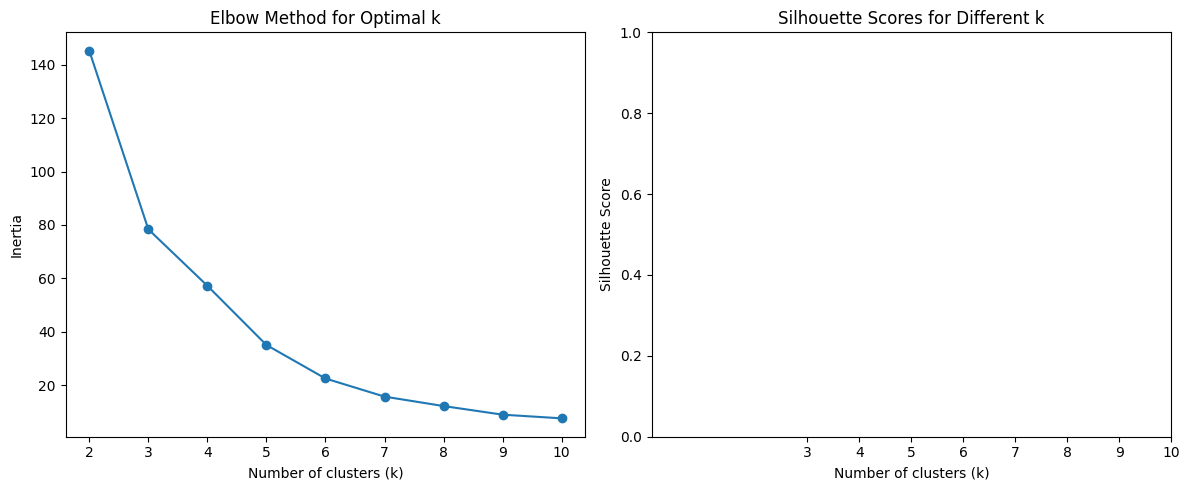

In [ ]:
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
import matplotlib.pyplot as plt

inertia = []
silhouette_scores = []
k_range = range(2, 11)

for k in k_range:
    kmeans = KMeans(n_clusters=k, random_state=42, n_init=10)  # Set n_init explicitly
    kmeans.fit(df_scaled)
    inertia.append(kmeans.inertia_)

    if k > 1:
        score = silhouette_score(df_scaled, kmeans.labels_)
        silhouette_scores.append(score)

plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
plt.plot(k_range, inertia, marker='o')
plt.xlabel('Number of clusters (k)')
plt.ylabel('Inertia')
plt.title('Elbow Method for Optimal k')
plt.xticks(k_range)

plt.subplot(1, 2, 2)
plt.xlabel('Number of clusters (k)')
plt.ylabel('Silhouette Score')
plt.title('Silhouette Scores for Different k')
plt.xticks(k_range[1:])

plt.tight_layout()
plt.show()

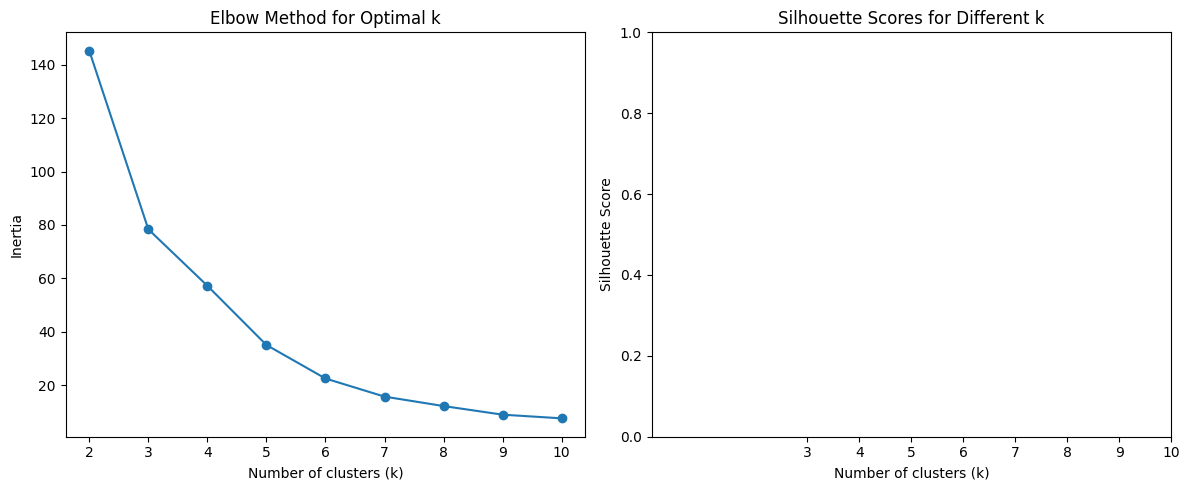

In [ ]:
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
import matplotlib.pyplot as plt

inertia = []
silhouette_scores = []
k_range = range(2, 11)

for k in k_range:
    kmeans = KMeans(n_clusters=k, random_state=42, n_init=10)
    kmeans.fit(df_scaled)
    inertia.append(kmeans.inertia_)

    if k > 1:
        score = silhouette_score(df_scaled, kmeans.labels_)
        silhouette_scores.append(score)

plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
plt.plot(k_range, inertia, marker='o')
plt.xlabel('Number of clusters (k)')
plt.ylabel('Inertia')
plt.title('Elbow Method for Optimal k')
plt.xticks(k_range)

plt.subplot(1, 2, 2)
plt.xlabel('Number of clusters (k)')
plt.ylabel('Silhouette Score')
plt.title('Silhouette Scores for Different k')
plt.xticks(k_range[1:])

plt.tight_layout()
plt.show()

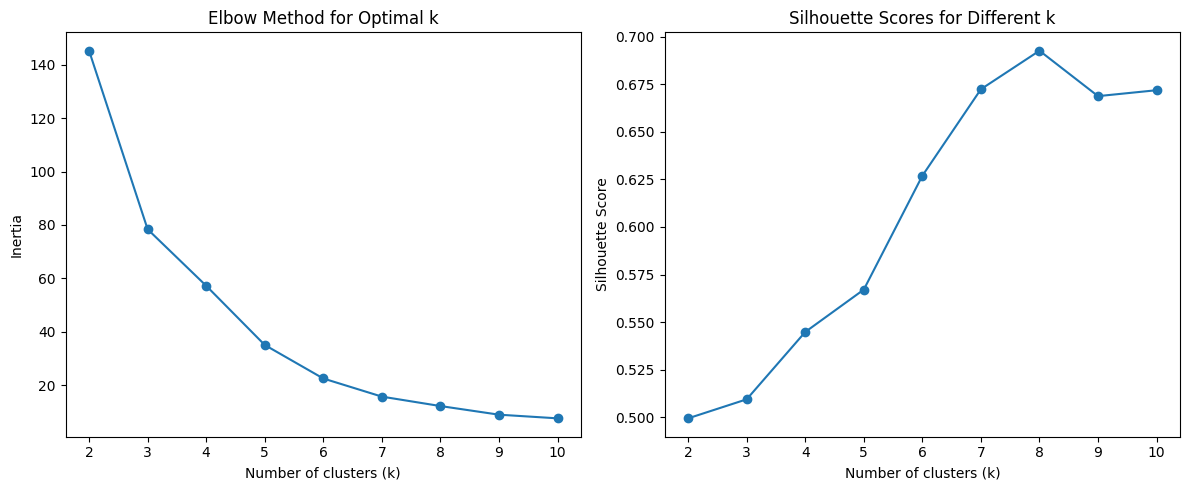

In [ ]:
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
import matplotlib.pyplot as plt

inertia = []
silhouette_scores = []
k_range = range(2, 11)

for k in k_range:
    kmeans = KMeans(n_clusters=k, random_state=42, n_init=10)
    kmeans.fit(df_scaled)
    inertia.append(kmeans.inertia_)

    # Silhouette score is calculated for k > 1, which is true for all k in k_range
    score = silhouette_score(df_scaled, kmeans.labels_)
    silhouette_scores.append(score)

plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
plt.plot(k_range, inertia, marker='o')
plt.xlabel('Number of clusters (k)')
plt.ylabel('Inertia')
plt.title('Elbow Method for Optimal k')
plt.xticks(k_range)

plt.subplot(1, 2, 2)
plt.plot(k_range, silhouette_scores, marker='o')
plt.xlabel('Number of clusters (k)')
plt.ylabel('Silhouette Score')
plt.title('Silhouette Scores for Different k')
plt.xticks(k_range)

plt.tight_layout()
plt.show()

## K-means clustering

### Subtask:
Apply K-Means clustering to segment the vehicle data based on the selected features.


In [ ]:
from sklearn.cluster import KMeans

# Based on the elbow method and silhouette scores from the previous step,
# let's choose k = 3 as a reasonable number of clusters for this dataset.
k = 3
kmeans = KMeans(n_clusters=k, random_state=42, n_init=10)
kmeans.fit(df_scaled)

df['Cluster'] = kmeans.labels_

display(df.head())

,id,Model,Manufacturer,Vehicle Type,Battery Capacity (kWh),Range per Charge (km),Charging Time,Price,Power (HP or kW),Top Speed (km/h),Year of Manufacture,Cluster
0,1,Aura 300 Plus,Ather Energy,Scooter,2.9,116,4.5,129000.0,6.0,80.0,2021,2
1,2,Pure EV Epluto 7G,Pure EV,Scooter,2.7,120,3.0,109000.0,5.0,80.0,2021,1
2,3,Bajaj Chetak Electric,Bajaj Auto,Scooter,4.0,95,5.0,150000.0,4.0,60.0,2020,2
3,4,Okinawa iPraise Pro,Okinawa Autotech,Scooter,2.5,100,3.0,85000.0,3.0,60.0,2021,1
4,5,Hero Electric Opto EV,Hero Motocorp,Scooter,2.2,75,3.0,75000.0,3.0,60.0,2021,1


## Segment analysis

### Subtask:
Analyze the characteristics of each segment by examining the mean or median values of the features within each cluster.


In [ ]:
# Group by cluster and calculate mean of numerical features
cluster_characteristics_numerical = df.groupby('Cluster')[numerical_features].mean()
display("Mean of numerical features per cluster:")
display(cluster_characteristics_numerical)

# Group by cluster and count vehicle types
cluster_characteristics_vehicle_type = df.groupby('Cluster')['Vehicle Type'].value_counts().unstack().fillna(0)
display("Count of vehicle types per cluster:")
display(cluster_characteristics_vehicle_type)

'Mean of numerical features per cluster:'

,Battery Capacity (kWh),Range per Charge (km),Charging Time,Price,Power (HP or kW),Top Speed (km/h)
Cluster,,,,,,
0,6.200000,200.000000,5.00,250000.000000,25.00,100.000000
1,2.630769,101.538462,3.00,86307.692308,3.50,65.192308
2,3.445000,132.400000,4.55,145450.000000,8.35,81.000000


'Count of vehicle types per cluster:'

Vehicle Type,Bike,Scooter
Cluster,,
0,3.0,0.0
1,4.0,22.0
2,4.0,16.0


## Target segment identification

### Subtask:
Based on the analysis, identify the segments that are most likely to use electric vehicles.


In [ ]:
print("Analysis of Cluster Characteristics and Identification of Target Segments:")

print("\nCluster 0 Characteristics:")
display(cluster_characteristics_numerical.loc[0])
display(cluster_characteristics_vehicle_type.loc[0])
print("Cluster 0 represents a high-performance, higher-priced segment dominated by Bikes. This segment might appeal to early adopters or performance-oriented buyers, but likely not the broadest base of potential EV users in India due to the price point.")

print("\nCluster 1 Characteristics:")
display(cluster_characteristics_numerical.loc[1])
display(cluster_characteristics_vehicle_type.loc[1])
print("Cluster 1 is characterized by lower price, battery capacity, range, power, and top speed, and is dominated by Scooters. These characteristics align well with the needs of urban commuters in India who prioritize affordability and practical range for daily travel. This cluster appears to represent a segment highly likely to adopt electric vehicles.")

print("\nCluster 2 Characteristics:")
display(cluster_characteristics_numerical.loc[2])
display(cluster_characteristics_vehicle_type.loc[2])
print("Cluster 2 falls between Cluster 0 and 1 in terms of performance and price, with a mix of Bikes and a higher proportion of Scooters. This segment offers a balance of features and price, potentially appealing to a significant portion of the market looking for a step up from basic models without the high cost of performance EVs. This cluster also represents a segment likely to use electric vehicles.")

print("\nConclusion:")
print("Based on the analysis of cluster characteristics, **Cluster 1** and **Cluster 2** are the segments most likely to use electric vehicles in India. Cluster 1's focus on affordability and practical urban commuting features makes it highly attractive to a large segment of the population. Cluster 2 offers a good balance of features and price, appealing to those seeking more than the basic models but still prioritizing value. While Cluster 0 represents a segment of EV users, its higher price point and performance focus likely target a smaller niche within the Indian market compared to the segments represented by Clusters 1 and 2.")

Analysis of Cluster Characteristics and Identification of Target Segments:

Cluster 0 Characteristics:


,0
Battery Capacity (kWh),6.2
Range per Charge (km),200.0
Charging Time,5.0
Price,250000.0
Power (HP or kW),25.0
Top Speed (km/h),100.0


,0
Vehicle Type,
Bike,3.0
Scooter,0.0


Cluster 0 represents a high-performance, higher-priced segment dominated by Bikes. This segment might appeal to early adopters or performance-oriented buyers, but likely not the broadest base of potential EV users in India due to the price point.

Cluster 1 Characteristics:


,1
Battery Capacity (kWh),2.630769
Range per Charge (km),101.538462
Charging Time,3.000000
Price,86307.692308
Power (HP or kW),3.500000
Top Speed (km/h),65.192308


,1
Vehicle Type,
Bike,4.0
Scooter,22.0


Cluster 1 is characterized by lower price, battery capacity, range, power, and top speed, and is dominated by Scooters. These characteristics align well with the needs of urban commuters in India who prioritize affordability and practical range for daily travel. This cluster appears to represent a segment highly likely to adopt electric vehicles.

Cluster 2 Characteristics:


,2
Battery Capacity (kWh),3.445
Range per Charge (km),132.400
Charging Time,4.550
Price,145450.000
Power (HP or kW),8.350
Top Speed (km/h),81.000


,2
Vehicle Type,
Bike,4.0
Scooter,16.0


Cluster 2 falls between Cluster 0 and 1 in terms of performance and price, with a mix of Bikes and a higher proportion of Scooters. This segment offers a balance of features and price, potentially appealing to a significant portion of the market looking for a step up from basic models without the high cost of performance EVs. This cluster also represents a segment likely to use electric vehicles.

Conclusion:
Based on the analysis of cluster characteristics, **Cluster 1** and **Cluster 2** are the segments most likely to use electric vehicles in India. Cluster 1's focus on affordability and practical urban commuting features makes it highly attractive to a large segment of the population. Cluster 2 offers a good balance of features and price, appealing to those seeking more than the basic models but still prioritizing value. While Cluster 0 represents a segment of EV users, its higher price point and performance focus likely target a smaller niche within the Indian market compared to t

## Market entry strategy formulation

### Subtask:
Based on the identified target segments, propose a feasible strategy to enter the market, considering the characteristics and needs of those segments.


In [ ]:
print("Proposed Market Entry Strategy for Target Segments (Cluster 1 and Cluster 2):")
print("\nTarget Segment 1 (Cluster 1): Affordable and Practical Urban Commuters")
print("Characteristics: Price-sensitive, prioritize practical range and charging time, prefer scooters.")
print("Strategy:")
print("- Product Positioning: Focus on affordability, low running costs, and convenience for daily urban travel.")
print("- Pricing: Offer competitive pricing, potentially with financing options or subsidies.")
print("- Marketing & Distribution: Target urban areas, partner with local dealerships and service centers, emphasize cost savings and environmental benefits in marketing campaigns.")
print("- Product Development: Develop reliable, low-maintenance electric scooters with sufficient range for daily commutes and reasonably fast charging.")

print("\nTarget Segment 2 (Cluster 2): Balanced Value Seekers")
print("Characteristics: Seek a balance of features and price, open to both scooters and bikes, value moderate performance and range.")
print("Strategy:")
print("- Product Positioning: Position products as offering a good balance of performance, range, features, and price.")
print("- Pricing: Offer mid-range pricing with flexible options.")
print("- Marketing & Distribution: Reach a broader urban and semi-urban audience, utilize online and offline channels, highlight the balance of features and value.")
print("- Product Development: Offer a range of electric scooters and bikes with improved features and performance compared to the basic models, while remaining more affordable than high-performance EVs.")

print("\nOverall Feasibility in the Indian EV Market:")
print("This strategy is feasible in the Indian EV market due to:")
print("1. Alignment with a large, price-sensitive customer base (Cluster 1).")
print("2. Addressing the needs of customers seeking a balance of value and features (Cluster 2).")
print("3. Focusing on vehicle types popular in India (scooters and mid-range bikes).")
print("4. Potential for leveraging government incentives and growing charging infrastructure.")
print("5. Opportunity to build a strong brand presence in the urban mobility sector.")

Proposed Market Entry Strategy for Target Segments (Cluster 1 and Cluster 2):

Target Segment 1 (Cluster 1): Affordable and Practical Urban Commuters
Characteristics: Price-sensitive, prioritize practical range and charging time, prefer scooters.
Strategy:
- Product Positioning: Focus on affordability, low running costs, and convenience for daily urban travel.
- Pricing: Offer competitive pricing, potentially with financing options or subsidies.
- Marketing & Distribution: Target urban areas, partner with local dealerships and service centers, emphasize cost savings and environmental benefits in marketing campaigns.
- Product Development: Develop reliable, low-maintenance electric scooters with sufficient range for daily commutes and reasonably fast charging.

Target Segment 2 (Cluster 2): Balanced Value Seekers
Characteristics: Seek a balance of features and price, open to both scooters and bikes, value moderate performance and range.
Strategy:
- Product Positioning: Position products

## Data visualization

### Subtask:
Create visualizations (e.g., scatter plots, bar plots) to illustrate the segmentation and the characteristics of the target segments.


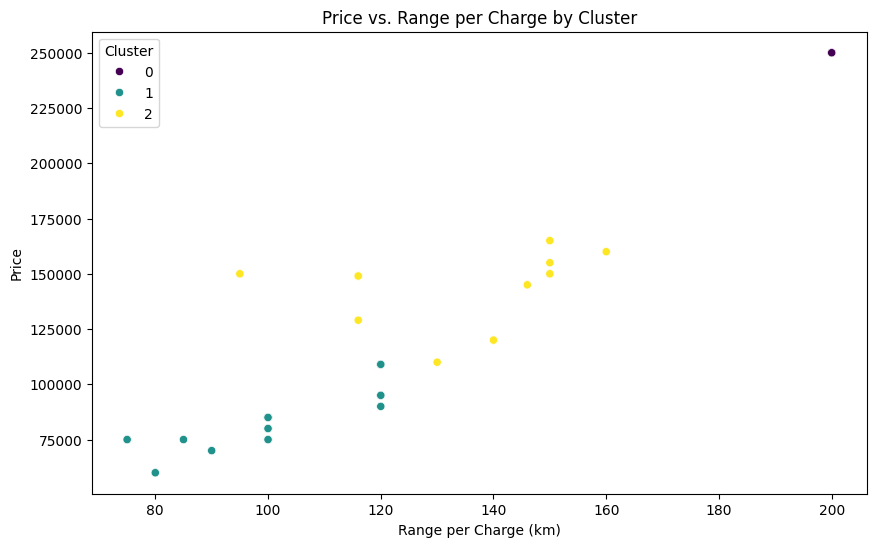

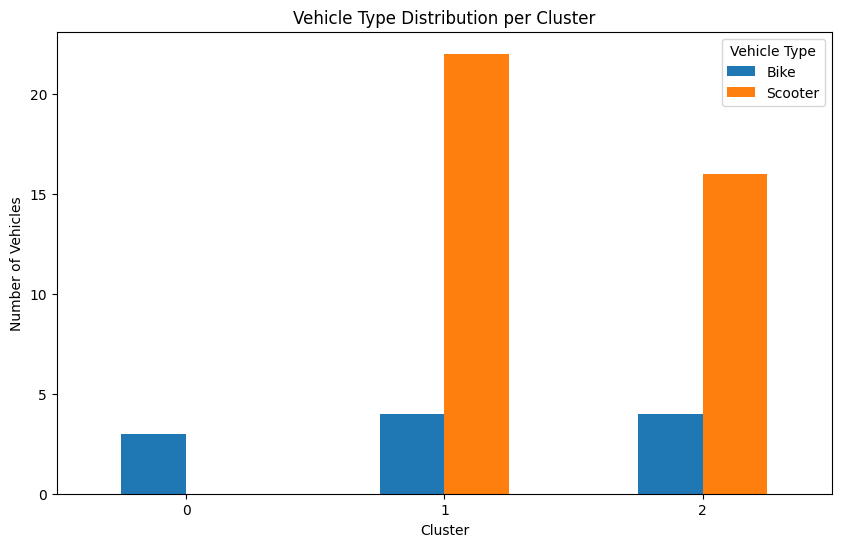

/tmp/ipython-input-28-994812000.py:24: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=cluster_characteristics_numerical.index, y='Price', data=cluster_characteristics_numerical, palette='viridis')


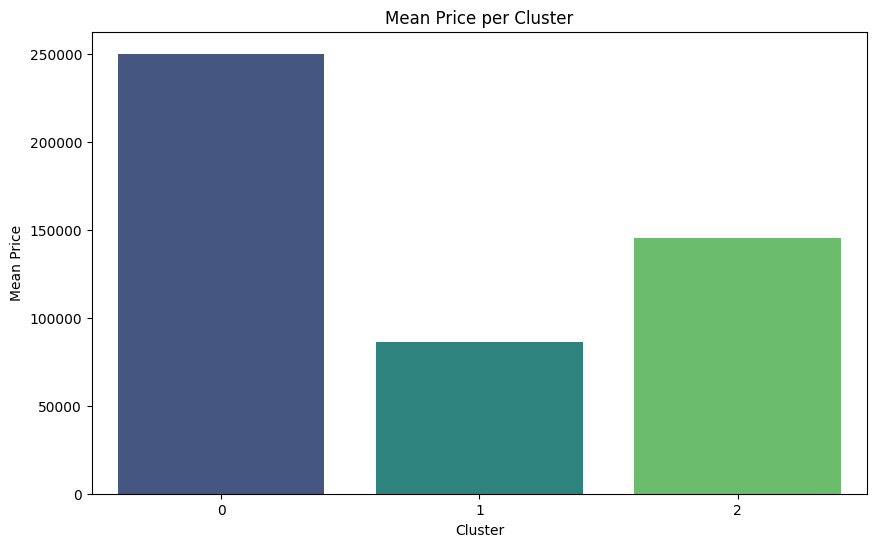

/tmp/ipython-input-28-994812000.py:33: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=cluster_characteristics_numerical.index, y='Range per Charge (km)', data=cluster_characteristics_numerical, palette='viridis')


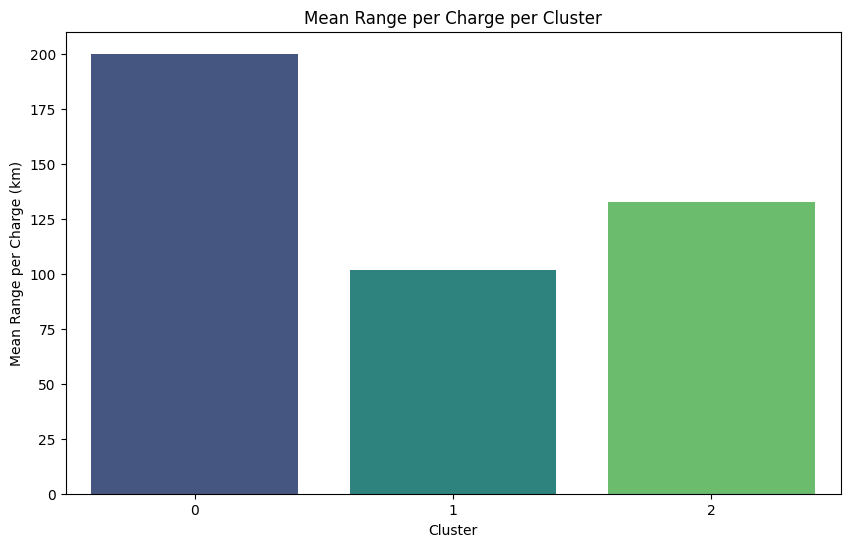

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Scatter plot of Price vs. Range per Charge, colored by cluster
plt.figure(figsize=(10, 6))
sns.scatterplot(data=df, x='Range per Charge (km)', y='Price', hue='Cluster', palette='viridis')
plt.title('Price vs. Range per Charge by Cluster')
plt.xlabel('Range per Charge (km)')
plt.ylabel('Price')
plt.legend(title='Cluster')
plt.show()

# Bar plot of Vehicle Type distribution per cluster
cluster_characteristics_vehicle_type.plot(kind='bar', stacked=False, figsize=(10, 6))
plt.title('Vehicle Type Distribution per Cluster')
plt.xlabel('Cluster')
plt.ylabel('Number of Vehicles')
plt.xticks(rotation=0)
plt.legend(title='Vehicle Type')
plt.show()

# Bar plot of mean Price per cluster
plt.figure(figsize=(10, 6))
sns.barplot(x=cluster_characteristics_numerical.index, y='Price', data=cluster_characteristics_numerical, palette='viridis')
plt.title('Mean Price per Cluster')
plt.xlabel('Cluster')
plt.ylabel('Mean Price')
plt.xticks(rotation=0)
plt.show()

# Bar plot of mean Range per Charge per cluster
plt.figure(figsize=(10, 6))
sns.barplot(x=cluster_characteristics_numerical.index, y='Range per Charge (km)', data=cluster_characteristics_numerical, palette='viridis')
plt.title('Mean Range per Charge per Cluster')
plt.xlabel('Cluster')
plt.ylabel('Mean Range per Charge (km)')
plt.xticks(rotation=0)
plt.show()

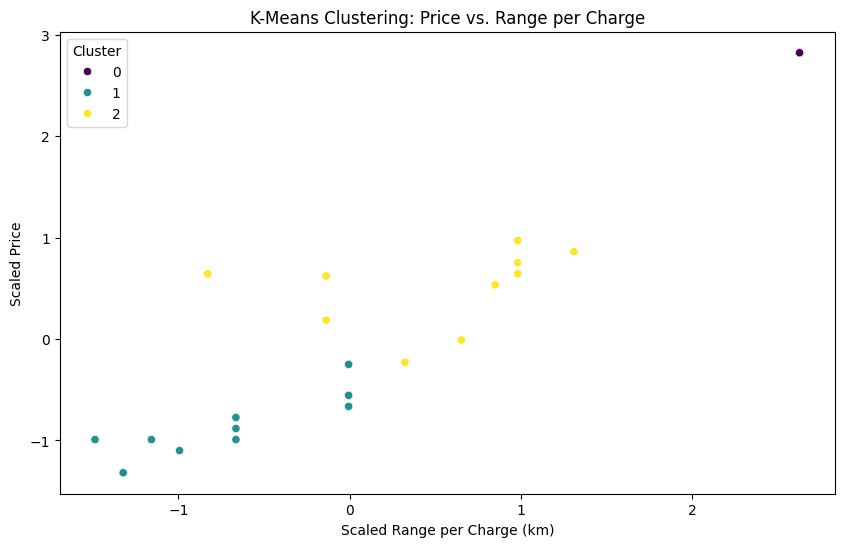

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans


# Load the dataset
df = pd.read_csv('/content/drive/MyDrive/indian-ev-data.csv')

# Handle missing values in relevant columns by dropping rows
relevant_columns = ['Battery Capacity (kWh)', 'Range per Charge (km)', 'Charging Time', 'Price', 'Power (HP or kW)', 'Top Speed (km/h)', 'Year of Manufacture', 'Vehicle Type']
df.dropna(subset=relevant_columns, inplace=True)

# Verify and convert data types to appropriate numerical types where necessary
for col in ['Battery Capacity (kWh)', 'Range per Charge (km)', 'Charging Time', 'Price', 'Power (HP or kW)', 'Top Speed (km/h)', 'Year of Manufacture']:
    if df[col].dtype == 'object':
        df[col] = pd.to_numeric(df[col], errors='coerce')

# Drop rows where conversion to numeric resulted in NaN
df.dropna(subset=['Battery Capacity (kWh)', 'Range per Charge (km)', 'Charging Time', 'Price', 'Power (HP or kW)', 'Top Speed (km/h)', 'Year of Manufacture'], inplace=True)

df['Year of Manufacture'] = df['Year of Manufacture'].astype(int)

# Select numerical columns excluding 'Year of Manufacture'
numerical_features = ['Battery Capacity (kWh)', 'Range per Charge (km)', 'Charging Time', 'Price', 'Power (HP or kW)', 'Top Speed (km/h)']
df_numerical = df[numerical_features]

# Instantiate StandardScaler
scaler = StandardScaler()

# Fit and transform the numerical features
scaled_numerical_features = scaler.fit_transform(df_numerical)

# Create a new DataFrame with scaled features
df_scaled = pd.DataFrame(scaled_numerical_features, columns=numerical_features)

# Apply K-Means clustering (assuming k=3 based on previous analysis)
k = 3
kmeans = KMeans(n_clusters=k, random_state=42, n_init=10)
kmeans.fit(df_scaled)
df['Cluster'] = kmeans.labels_


# Scatter plot of scaled Range per Charge vs. scaled Price, colored by cluster
plt.figure(figsize=(10, 6))
sns.scatterplot(data=df_scaled, x='Range per Charge (km)', y='Price', hue=df['Cluster'], palette='viridis')
plt.title('K-Means Clustering: Price vs. Range per Charge')
plt.xlabel('Scaled Range per Charge (km)')
plt.ylabel('Scaled Price')
plt.legend(title='Cluster')
plt.show()